In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
import matplotlib.pyplot as plt
import shap

In [2]:
data = pd.read_csv("data/Literacy rates (no pw2).csv")

In [3]:
data = data.drop(columns=["index"])

In [4]:
regions = data.Region.unique().tolist()

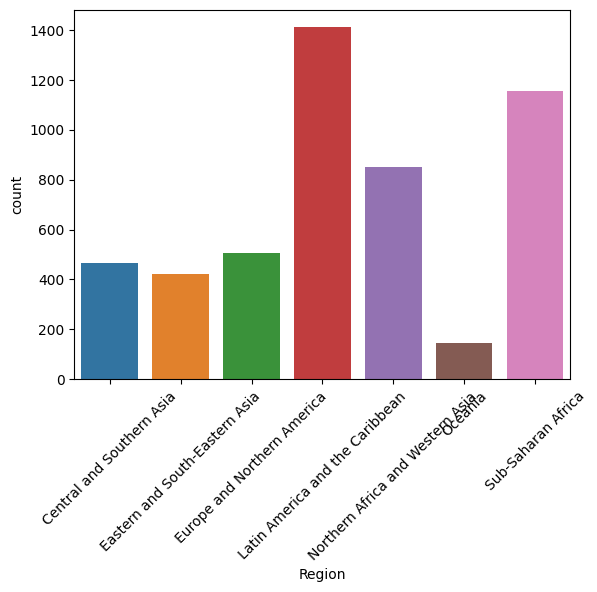

In [5]:
sns.countplot(x=data.Region);
plt.xticks(rotation=45);

In [6]:
region_to_id  = dict(zip(regions, [i for i in range(len(regions))]))

In [7]:
region_to_id

{'Central and Southern Asia': 0,
 'Eastern and South-Eastern Asia': 1,
 'Europe and Northern America': 2,
 'Latin America and the Caribbean': 3,
 'Northern Africa and Western Asia': 4,
 'Oceania': 5,
 'Sub-Saharan Africa': 6}

In [8]:
data['Region'] = data.Region.apply(lambda x: region_to_id[x])

In [9]:
data

,Region,Country,Year,Age,Gender,Literacy rate
0,0,Afghanistan,2011,15+,female,0.176121
1,0,Afghanistan,2011,15+,male,0.454171
2,0,Afghanistan,2011,15+,total,0.317411
3,0,Afghanistan,2011,15-24,female,0.321132
4,0,Afghanistan,2011,15-24,male,0.618791
...,...,...,...,...,...,...
4950,6,Zimbabwe,2014,25-64,male,0.897255
4951,6,Zimbabwe,2014,25-64,total,0.887874
4952,6,Zimbabwe,2014,65+,female,0.734258
4953,6,Zimbabwe,2014,65+,male,0.927231


In [10]:
label_encoders = []

for col in data:
    if data[col].dtype == "object":
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders.append(le)

In [25]:
for le in label_encoders:
    print(le.classes_)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Azerbaijan' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Central African Republic' 'Chad' 'Chile' 'China'
 'China, Macao Special Administrative Region' 'Colombia' 'Comoros' 'Congo'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' "Côte d'Ivoire"
 'Democratic Republic of the Congo' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji'
 'Gabon' 'Gambia' 'Georgia' 'Ghana' 'Greece' 'Grenada' 'Guadeloupe'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras'
 'Hungary' 'India' 'Indonesia' 'Iran (Islamic Republic of)' 'Iraq' 'Italy'
 'Jamaica' 'Jordan' 'Kazakhstan' 'Kenya' 'Kuwait' 'Kyrgyzstan'
 "Lao People's Democratic Republic" 'Latvia' 'Lebanon

In [11]:
data

,Region,Country,Year,Age,Gender,Literacy rate
0,0,0,2011,0,0,0.176121
1,0,0,2011,0,1,0.454171
2,0,0,2011,0,2,0.317411
3,0,0,2011,1,0,0.321132
4,0,0,2011,1,1,0.618791
...,...,...,...,...,...,...
4950,6,154,2014,2,1,0.897255
4951,6,154,2014,2,2,0.887874
4952,6,154,2014,3,0,0.734258
4953,6,154,2014,3,1,0.927231


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4955 entries, 0 to 4954
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         4955 non-null   int64  
 1   Country        4955 non-null   int64  
 2   Year           4955 non-null   int64  
 3   Age            4955 non-null   int64  
 4   Gender         4955 non-null   int64  
 5   Literacy rate  4955 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 232.4 KB


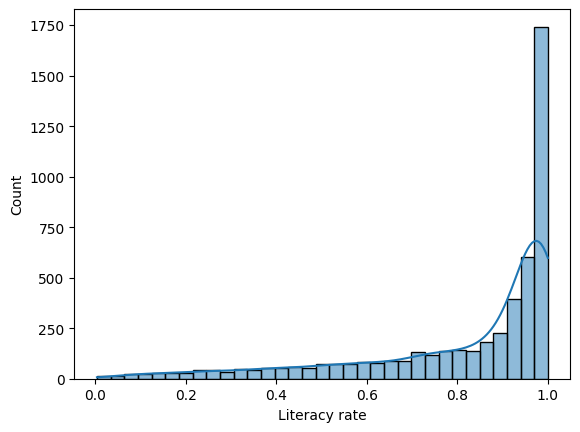

In [13]:
sns.histplot(data['Literacy rate'], kde=True);

In [22]:
data_2 = np.random.exponential(size=100000)

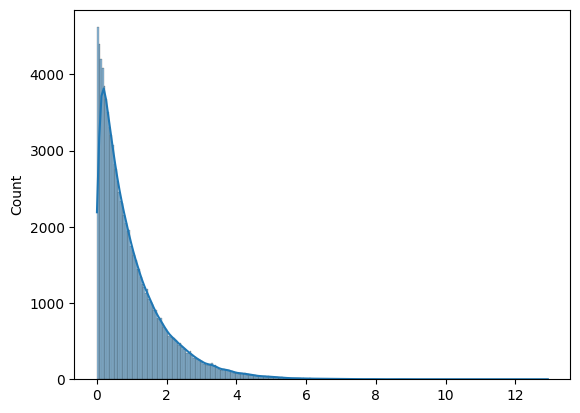

In [23]:
sns.histplot(data_2, kde=True);

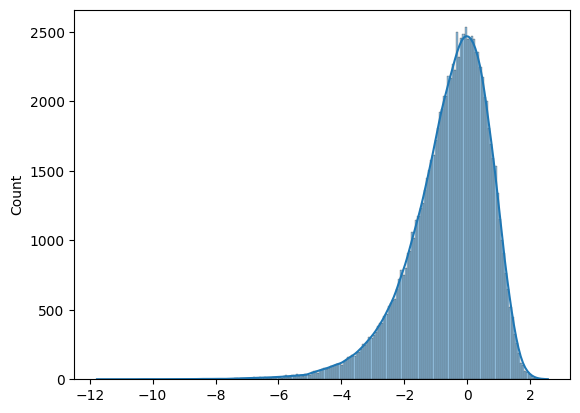

In [24]:
sns.histplot(np.log(data_2), kde=True);

In [32]:
model = LinearRegression()

In [35]:
x_train, x_test, y_train, y_test = train_test_split(data.drop('Literacy rate', axis=1),
                                                    data['Literacy rate'],
                                                    shuffle=True,
                                                    test_size=0.2)

In [36]:
x_train

,Region,Country,Year,Age,Gender
1737,3,31,2011,0,1
1555,3,15,2012,3,2
933,2,12,2018,2,1
1336,2,130,2015,0,2
1663,3,18,2017,3,2
...,...,...,...,...,...
724,1,110,2015,1,2
1602,3,18,2012,3,1
2293,3,90,2010,1,2
4403,6,84,2015,1,0


In [37]:
y_train

1737    0.934883
1555    0.723037
933     0.997947
1336    0.981433
1663    0.777720
          ...   
724     0.990826
1602    0.738652
2293    0.984345
4403    0.392078
3383    0.993194
Name: Literacy rate, Length: 3964, dtype: float64

In [38]:
model.fit(x_train,y_train)

LinearRegression()

In [39]:
preds = model.predict(x_test)

In [42]:
mae(preds, y_test)

0.16172477015387549